In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

 # magic command
%precision 3

'%.3f'

## 讀取資料

In [2]:
#當前目錄
pwd

'/Users/alisa/Documents/DS/東京大學資料科學家養成全書/ds_samplefiles/Exercise'

In [3]:
mkdir chap3

In [4]:
cd ./chap3

/Users/alisa/Documents/DS/東京大學資料科學家養成全書/ds_samplefiles/Exercise/chap3


In [5]:
import requests,zipfile
from io import StringIO
import io

In [6]:
# 下載zipfile並解壓縮
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [10]:
student = pd.read_csv('student-mat.csv',sep =';')

In [11]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 敘述統計

In [14]:
student['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [16]:
# 四分位距
student['absences'].describe()[6] - student['absences'].describe()[4]

8.0

In [33]:
# 變異數
student['absences'].var()

64.04954057700957



\begin{eqnarray}
\sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}


In [19]:
#標準差
student['absences'].std()

8.00309568710818



\begin{eqnarray}
\sigma = \sqrt{\frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2}
\end{eqnarray}


In [20]:
np.sqrt(student['absences'].var())

8.00309568710818

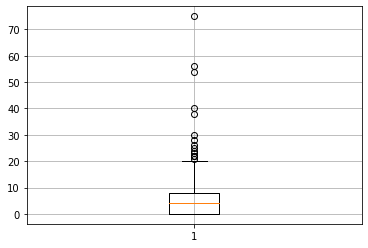

In [27]:
#箱形圖
plt.boxplot(student['absences'])
plt.grid(True)

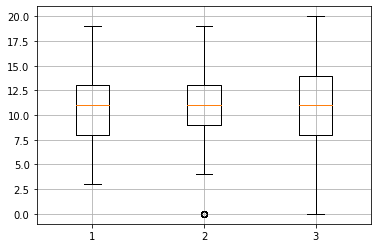

In [26]:
#箱形圖
plt.boxplot([student['G1'],student['G2'],student['G3']])
plt.grid(True)

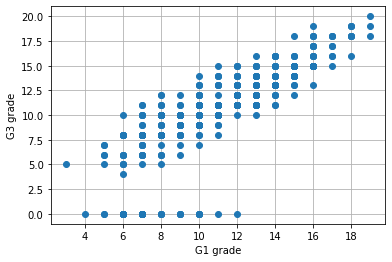

In [29]:
#散步圖-> 相關性
plt.plot(student['G1'], student['G3'], 'o')

# 標籤
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [30]:
# 共變異數
np.cov(student['G1'], student['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])


\begin{eqnarray}
S_{xy} = \frac{1}{n}\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})
\end{eqnarray}


In [32]:
#（相關係數,P值）
sp.stats.pearsonr(student['G1'], student['G3'])

(0.8014679320174141, 9.001430312277354e-90)


\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}}
\end{eqnarray}


In [36]:
# 相關矩陣
np.corrcoef(student['G1'], student['G3'])

array([[1.   , 0.801],
       [0.801, 1.   ]])

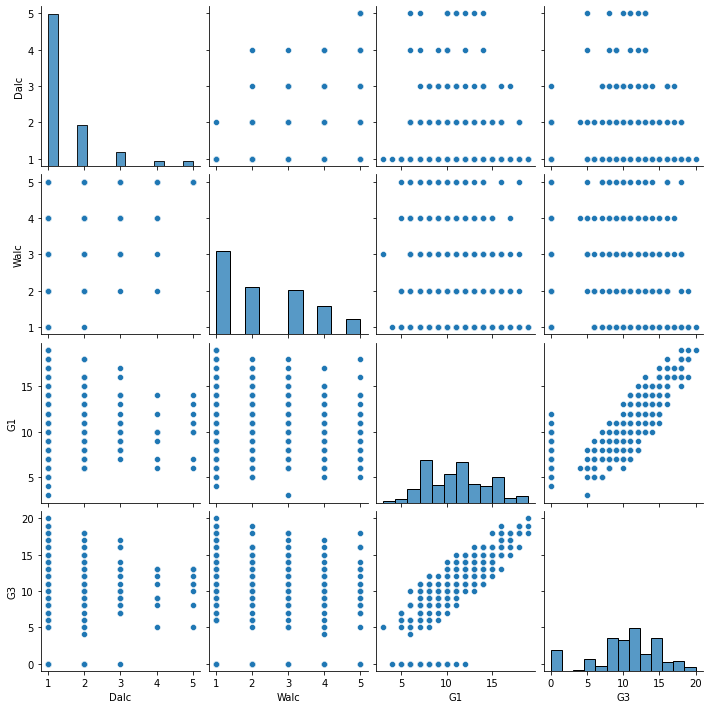

In [37]:
sns.pairplot(student[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

## 簡單迴歸分析

In [39]:
from sklearn import linear_model

In [41]:
#生成線性的實例
reg = linear_model.LinearRegression()

In [43]:
# 解釋變數使用第一學期的數學成績
# loc從DF取出指定的列與行。loc[:, ['G1']]會取出Ｇ1的所有行
# 使用values
X = student.loc[:, ['G1']].values

# 目標變數使用最後一學期的數學成績
Y = student['G3'].values
 
# 計算預測模型（a,b)
reg.fit(X, Y)
 
# 迴歸係數
print('迴歸係數:', reg.coef_)
 
# 截距 
print('截距:', reg.intercept_)

迴歸係數: [1.106]
截距: -1.6528038288004634


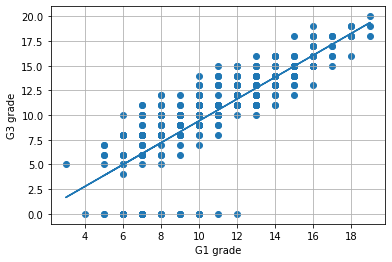

In [45]:
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# 畫出迴歸的直線
plt.plot(X, reg.predict(X))
plt.grid(True)

In [46]:
# 決定係數(越接近1 越好)
print('決定係数:', reg.score(X, Y))

決定係数: 0.6423508460522701
